# Importing Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data

In [118]:
path = './Dataset/ipl_2022_dataset.csv'
ipl = pd.read_csv(path)
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


# Data Wrangling

In [119]:
# Dropping Unnamed Column

ipl.drop("Unnamed: 0", axis = 1, inplace=True)

In [120]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [121]:
# All the columns of dataframe

ipl.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [122]:
# Total number of players

rows, columns = ipl.shape
print("The total number of players sold are:", rows)

The total number of players sold are: 633


In [123]:
# Info about the data

ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


In [124]:
# Total null values

ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [125]:
# Null values in cost columns
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [126]:
# Let us fill null values with 0 to make statistical anaylysis easier

ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)


In [127]:
ipl[ipl['Cost IN $ (000)'] == 0]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,0.0,0.0,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,0.0,0.0,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,0.0,0.0,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,0.0,0.0,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,0.0,0.0,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [128]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)      0
Cost IN $ (000)      0
2021 Squad         434
Team                 0
dtype: int64

In [129]:
# Let us take a look at null values in 2021 Squad Column

ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [130]:
# Replace them with some over text

ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [131]:
ipl[ipl['2021 Squad'] == 'Not Participated']

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,Not Participated,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,Not Participated,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,Not Participated,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,Not Participated,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,Not Participated,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold


In [132]:
ipl.isnull().sum() # We can see we are left with no more null values

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [133]:
# Renaming Columns to proper case anf format
ipl.rename(columns={'TYPE':'Type','COST IN ₹ (CR.)': 'Cost in ₹ (CR.)', 'Cost IN $ (000)': 'Cost in $ (K)', 
                   '2021 Squad': 'Team(2021)', 'Team': 'Team(2022)'}, inplace=True)
ipl

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022)
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold


In [134]:
# Add a column os status 
team = ipl[ipl['Cost in $ (K)'] > 0]['Team(2022)'].unique()
ipl['Status'] = ipl['Team(2022)'].replace(team, 'Sold')
ipl

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [135]:
# Look for duplicated entries

ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [136]:
# How many players participated?

print("The number of players participated are:", rows)

The number of players participated are: 633


In [137]:
# How many types of player participated?

type = ipl['Type'].value_counts()
type

ALL-ROUNDER     242
BOWLER          215
BATTER          112
WICKETKEEPER     64
Name: Type, dtype: int64

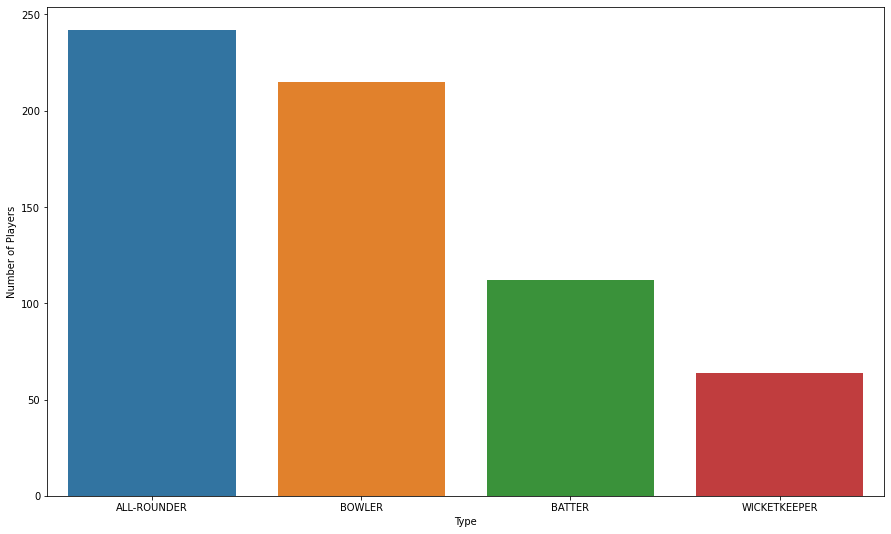

In [138]:
plt.figure(figsize=(15, 9))
sns.barplot(x = type.index,  y = type)
plt.xlabel('Type')
plt.ylabel('Number of Players')
plt.show()

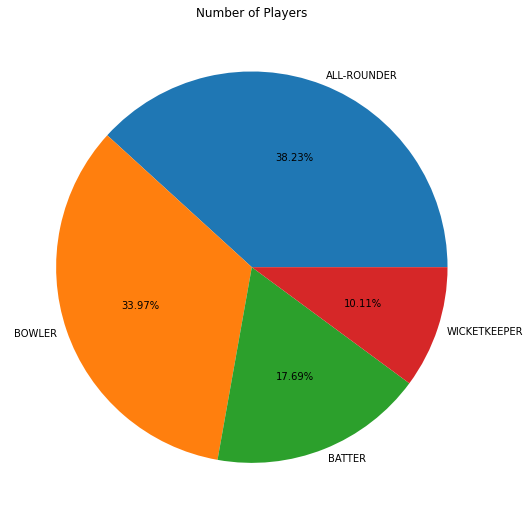

In [139]:
plt.figure(figsize=(12, 9))
plt.pie(x = type, labels=type.index, autopct='%1.2f%%', labeldistance=1.05)
plt.title("Number of Players")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


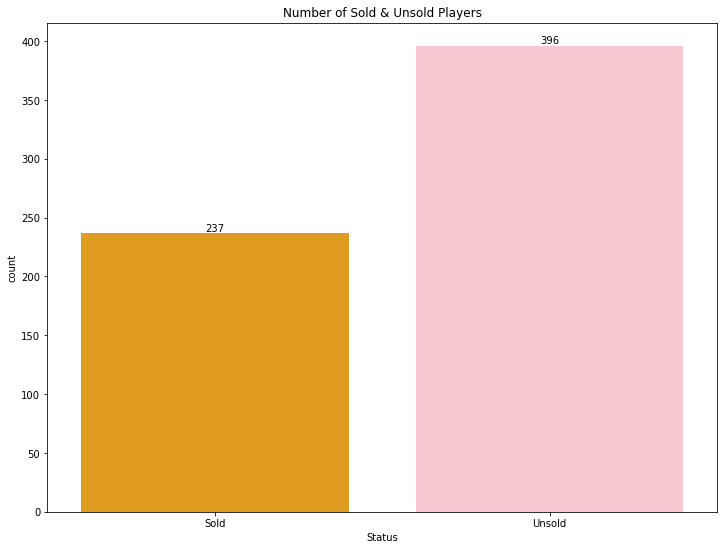

In [140]:
# Number of sold and unsold players

plt.figure(figsize=(12, 9))
fig = sns.countplot(ipl['Status'], palette=['Orange', 'Pink'])
plt.title("Number of Sold & Unsold Players")
fig.bar_label(fig.containers[0])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


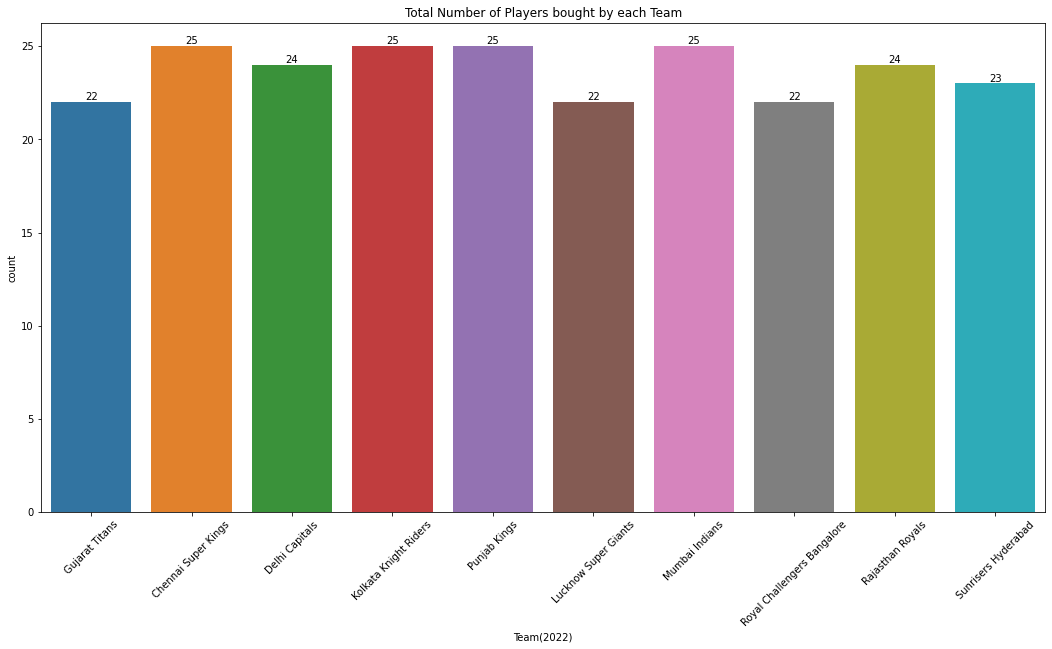

In [204]:
# Total number of players bought by each team

plt.figure(figsize=(18, 9))
fig = sns.countplot(ipl[ipl['Status'] != 'Unsold']['Team(2022)'])
plt.title("Total Number of Players bought by each Team")
plt.xticks(rotation = 45)
fig.bar_label(fig.containers[0])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


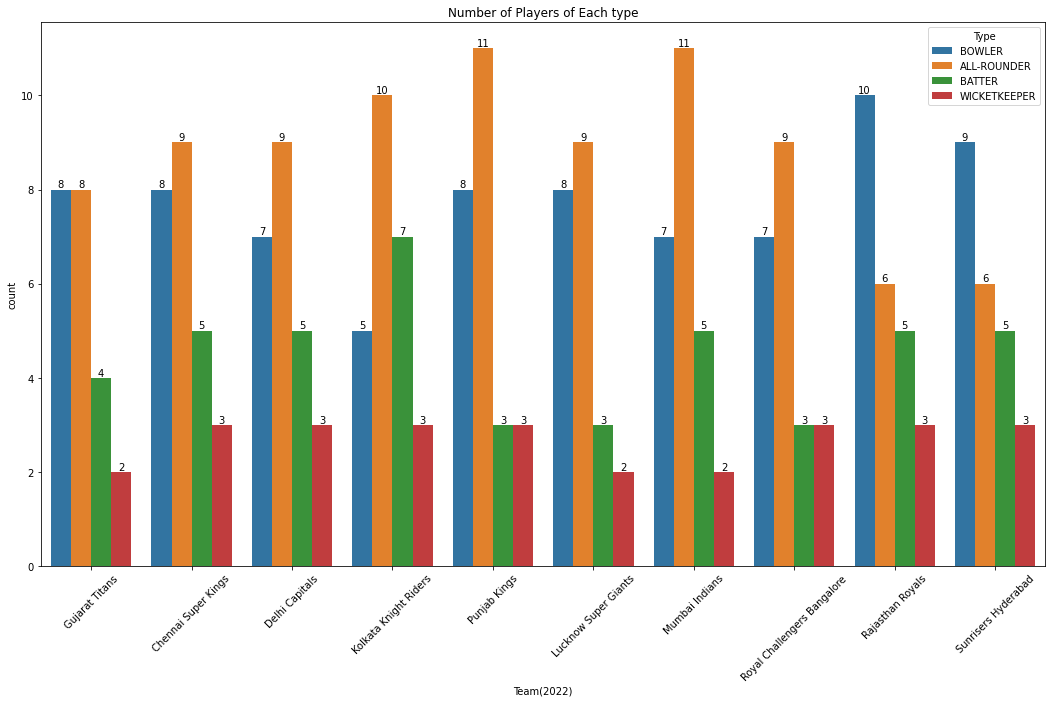

In [142]:
# Number of player in each team
plt.figure(figsize=(18, 10))
fig = sns.countplot(ipl[ipl['Team(2022)'] != 'Unsold']['Team(2022)'], hue=ipl['Type'])
plt.title("Number of Players of Each type")
plt.xticks(rotation = 45)

for i in range(0,4):
    fig.bar_label(fig.containers[i])
plt.show()

In [143]:
# Highest amount spent on single player by each team

max_team = ipl[ipl['Team(2022)'] != 'Unsold'].groupby(['Team(2022)'], as_index=False)['Cost in ₹ (CR.)'].max()
max_team.rename(columns={'Cost in ₹ (CR.)': 'Maximum Price'}, inplace = True)
max_team = max_team.sort_values(by = 'Maximum Price', ascending=False)
max_team

,Team(2022),Maximum Price
4,Lucknow Super Giants,17.00
0,Chennai Super Kings,16.00
1,Delhi Capitals,16.00
5,Mumbai Indians,16.00
2,Gujarat Titans,15.00
8,Royal Challengers Bangalore,15.00
7,Rajasthan Royals,14.00
9,Sunrisers Hyderabad,14.00
3,Kolkata Knight Riders,12.25
6,Punjab Kings,12.00


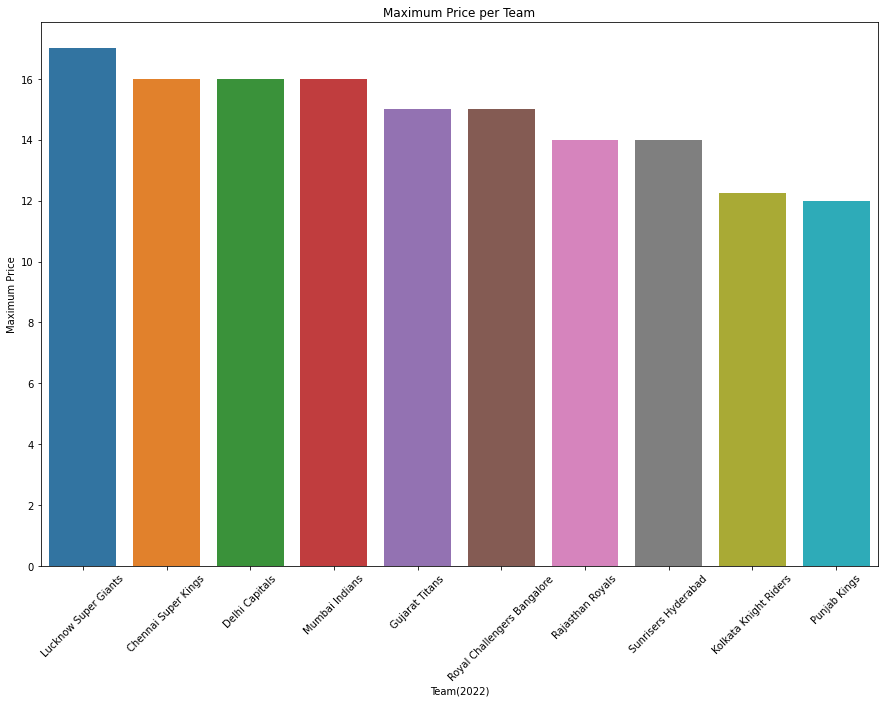

In [145]:
# Plotting the result

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Team(2022)', y = 'Maximum Price', data = max_team)
plt.title("Maximum Price per Team")
plt.xticks(rotation = 45)
plt.show()

In [149]:
# Grouing into retention and base price 
ipl['Retention'] = ipl['Base Price']
ipl['Retention'].value_counts()

20 Lakh       344
50 Lakh       104
2 Cr           48
1 Cr           33
Retained       27
75 Lakh        26
1.5 Cr         20
40 Lakh        16
30 Lakh         9
Draft Pick      6
Name: Retention, dtype: int64

In [156]:
# Replacing all the values with keywords

ipl['Retention'].replace(['20 Lakh', '50 Lakh', '2 Cr', '1 Cr', '75 Lakh', '1.5 Cr', '40 Lakh', '30 Lakh'],
                         'From Auction', inplace = True)
ipl['Retention'].value_counts()

From Auction    600
Retained         27
Draft Pick        6
Name: Retention, dtype: int64

In [153]:
# Treating Base Price

ipl['Base Price'].value_counts()

20 Lakh       344
50 Lakh       104
2 Cr           48
1 Cr           33
Retained       27
75 Lakh        26
1.5 Cr         20
40 Lakh        16
30 Lakh         9
Draft Pick      6
Name: Base Price, dtype: int64

In [154]:
ipl['Base Price'].replace('Draft Pick', 0, inplace=True)
ipl['Base Price'].value_counts()

20 Lakh     344
50 Lakh     104
2 Cr         48
1 Cr         33
Retained     27
75 Lakh      26
1.5 Cr       20
40 Lakh      16
30 Lakh       9
0             6
Name: Base Price, dtype: int64

In [155]:
ipl

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction


In [159]:
# Player retained at maximum price

retained_max = ipl[ipl['Retention'] == 'Retained'].groupby("Team(2022)", as_index=False)['Cost in ₹ (CR.)'].max()
retained_max.rename(columns={'Cost in ₹ (CR.)': 'Maximum Price'}, inplace = True)
retained_max = retained_max.sort_values(by = 'Maximum Price', ascending=False)
retained_max

,Team(2022),Maximum Price
0,Chennai Super Kings,16.0
1,Delhi Capitals,16.0
3,Mumbai Indians,16.0
6,Royal Challengers Bangalore,15.0
5,Rajasthan Royals,14.0
7,Sunrisers Hyderabad,14.0
2,Kolkata Knight Riders,12.0
4,Punjab Kings,12.0


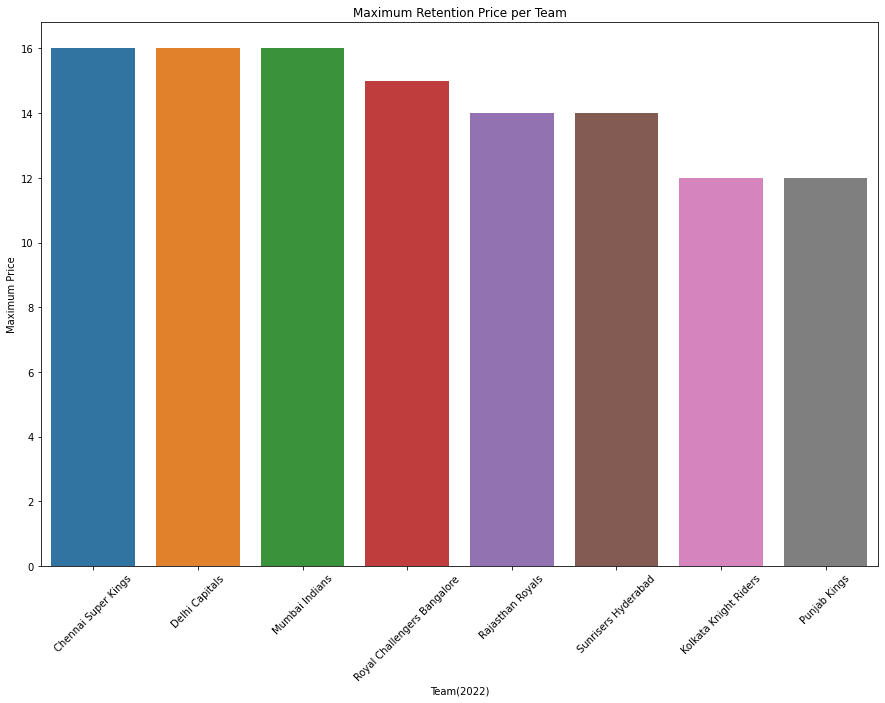

In [160]:
# Plotting

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Team(2022)', y = 'Maximum Price', data = retained_max)
plt.title("Maximum Retention Price per Team")
plt.xticks(rotation = 45)
plt.show()

In [164]:
# Who was the player?

ipl[ipl['Retention'] == 'Retained'].sort_values(by = 'Cost in ₹ (CR.)', ascending=False).head(1)

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status,Retention
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained


In [184]:
# Name of player per team

ipl[['Player', 'Team(2022)', 'Cost in ₹ (CR.)']][ipl['Retention'] == 'Retained'].sort_values(
    by = 'Cost in ₹ (CR.)', ascending=False).drop_duplicates('Team(2022)').reset_index()

,index,Player,Team(2022),Cost in ₹ (CR.)
0,22,Ravindra Jadeja,Chennai Super Kings,16.0
1,47,Rishabh Pant,Delhi Capitals,16.0
2,143,Rohit Sharma,Mumbai Indians,16.0
3,168,Virat Kohli,Royal Challengers Bangalore,15.0
4,214,Kane Williamson,Sunrisers Hyderabad,14.0
5,190,Sanju Samson,Rajasthan Royals,14.0
6,96,Mayank Agarwal,Punjab Kings,12.0
7,72,Andre Russell,Kolkata Knight Riders,12.0


In [196]:
# Top 5 Bowlers

bowler_5 = ipl[(ipl['Retention'] == 'From Auction') & (ipl['Type'] == 'BOWLER')]
bowler_5 = bowler_5.sort_values(by = 'Cost in ₹ (CR.)', ascending=False).head(5)
bowler_5

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status,Retention
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From Auction


In [200]:
# Top 5 Batsman


bowler_5 = ipl[(ipl['Retention'] == 'From Auction') & (ipl['Type'] == 'BATTER')]
bowler_5 = bowler_5.sort_values(by = 'Cost in ₹ (CR.)', ascending=False).head(5)
bowler_5

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status,Retention
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,From Auction
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,Sold,From Auction
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,Sold,From Auction
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,Sold,From Auction
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,Sold,From Auction


In [202]:
# Top 5 All-rounder

bowler_5 = ipl[(ipl['Retention'] == 'From Auction') & (ipl['Type'] == 'ALL-ROUNDER')]
bowler_5 = bowler_5.sort_values(by = 'Cost in ₹ (CR.)', ascending=False).head(5)
bowler_5

,Player,Base Price,Type,Cost in ₹ (CR.),Cost in $ (K),Team(2021),Team(2022),Status,Retention
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,Sold,From Auction
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,Sold,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold,From Auction


In [207]:
# Player who were part of last season but were not picked this season

ipl[(ipl['Team(2021)'] != 'Not Participated') & (ipl['Team(2022)'] == 'Unsold') ][['Player', 'Team(2021)']]

,Player,Team(2021)
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB
